<a href="https://colab.research.google.com/github/victortello17/victortello17/blob/main/Asignaci%C3%B3n_N3_(Victor_Tello_Marca).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASIGNACIÓN N° 3



> VICTOR TELLO MARCA




1. Considere el movimiento de una partícula $\alpha$ en un campo magnético despreciando la fuerza de fricción con el medio y la fuerza de la gravedad. Asumir que la dirección del campo $B$ es paralela al eje $z$.

a) (3p) Formule el modelo matemático del problema en forma de un sistema de ecuaciones diferenciales de primer orden para las funciones $x(t)$, $y(t)$, $z(t)$, $v_x(t)$, $v_y(t)$, $v_z(t)$. Implemente el algoritmo de Runge-Kutta de 4to orden para resolver el sistema de ecuaciones.

MODELO MATEMÁTICO:

◉ Consideramos el campo magnético $\vec{B}$ paralelo al eje Z, y la partícula cargada se mueve en el plano XY. La partícula describe una trayectoria circular de radio r.

◉ Consideremos una partícula cargada de masa m y carga q que parte del origen, con velocidad inicial: $\vec{v_o} = v_{ox} \hat{\imath} + v_{oy} \hat{\jmath} + v_{oz} \hat{k} $, en un campo magnético uniforme paralelo al eje Z, $\vec{B}=B_z \hat{k}$

La ecuación del movimiento es
\begin{equation}
m \dfrac{d\vec{v}}{dt}=q\vec{v}\times \vec{B}
\end{equation}

Nos brinda un sistema de ecuaciones diferenciales:
\begin{equation}
 \frac{d}{dt}v_x(t) = \dfrac{q}{m}Bv_y
\end{equation}
\begin{equation}
 \frac{d}{dt}v_y(t) = -\dfrac{q}{m}Bv_x
\end{equation}
\begin{equation}
 \frac{d}{dt}v_z(t) = 0
\end{equation}

Componentes $v_x$ y $v_y$ de la velocidad en función al tiempo $t$

Derivamos las primera ecuacion diferencial respecto al tiempo $t$
\begin{equation}
 \dfrac{d^2}{dt^2}v_x(t) = \dfrac{qB}{m} \dfrac{d}{dt}(v_y)
\end{equation}

Luego reemplazamos $\dfrac{d}{dt}v_y$, y hacemos que: $w=qB/m$:

\begin{equation}
 \dfrac{d^2}{dt^2}v_x(t) + w^2 v_x = 0
\end{equation}

La solución de esta ecuacion diferencial es conocida:
\begin{equation}
 v_x(t) = v_{ox}cos(wt) + v_{oy}sin(wt)
\end{equation}

Derivamos esta ecuacion:

\begin{equation}
 \dfrac{d}{dt}v_x(t) = w(-v_{ox}sin(wt) + v_{oy}cos(wt))
\end{equation}

Reemplazamos y hallamos $v_y$:

\begin{equation}
 v_y(t) = v_{oy}cos(wt) - v_{ox}sin(wt)
\end{equation}
La tercera ecuación diferencial es la más sencilla. Se trata de un movimiento uniforme a lo largo del eje $Z$
\begin{equation}
 \frac{d}{dt}v_z(t) = 0
\end{equation}
\begin{equation}
 v_z(t) = v_{oz}
\end{equation}

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# definimos las ecuaciones
def v_x(x, y, z, t):
    return vox * np.cos(w*t) + voy * np.sin(w*t)
def v_y(x, y, z, t):
    return voy * np.cos(w*t) - vox * np.sin(w*t)
def v_z(x, y, z, t):
    return voz

b) (4p) Modifique el programa pendulo.py (o escriba su propia) para
reolver el sistema de ecuaciones diferenciales mediante el método de Runge-Kutta de 4to orden, asumiendo el caso cuando la partícula ingresa por el punto $r(0, −1, 0)$ al campo magn ́etico constante $B = 0.5$ $\mu$T (campo aproximado en una vivienda donde hay corriente) con velocidad $\vec{v}_0$ perpendicular a $\vec{B}$. Sugerencia: empiece aplicando Euler simple o RK de 2do orden

In [ ]:
def sistema_runge_kutta(v_x, v_y, v_z, x0, y0, z0, to, tf, n):
    # inicializar valores
    h = (tf - to) / n
    t = np.zeros(n+1)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    # condiciones iniciales
    x[0] = x0
    y[0] = y0
    z[0] = z0
    for i in range(n):
        # calcular k1
        k1 = v_x(x[i], y[i], z[i], t[i] + h/2)
        l1 = v_y(x[i], y[i], z[i], t[i] + h/2)
        m1 = v_z(x[i], y[i], z[i], t[i] + h/2)
        # calcular k2
        k2 = v_x(x[i] + h*k1 / 2, y[i] + h*l1 / 2, z[i] + h*m1/2, t[i] + h/2)
        l2 = v_y(x[i] + h*k1 / 2, y[i] + h*l1 / 2, z[i] + h*m1/2, t[i] + h/2)
        m2 = v_z(x[i] + h*k1 / 2, y[i] + h*l1 / 2, z[i] + h*m1/2, t[i] + h/2)
        # calcular k3
        k3 = v_x(x[i] + h*k2 / 2, y[i] + h*l2 / 2, z[i] + h*m2/2, t[i] + h/2)
        l3 = v_y(x[i] + h*k2 / 2, y[i] + h*l2 / 2, z[i] + h*m2/2, t[i] + h/2)
        m3 = v_z(x[i] + h*k2 / 2, y[i] + h*l2 / 2, z[i] + h*m2/2, t[i] + h/2)
        # calcular k4
        k4 = v_x(x[i] + h*k3, y[i] + h*l3, z[i] + h*m3, t[i])
        l4 = v_y(x[i] + h*k3, y[i] + h*l3, z[i] + h*m3, t[i])
        m4 = v_z(x[i] + h*k3, y[i] + h*l3, z[i] + h*m3, t[i])
        # calcular nuevo valor de X
        x[i + 1] = x[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)*h
        y[i + 1] = y[i] + (1 / 6) * (l1 + 2 * l2 + 2 * l3 + l4)*h
        z[i + 1] = z[i] + (1 / 6) * (m1 + 2 * m2 + 2 * m3 + m4)*h
        t[i + 1] = t[i] + h
    return t, x, y, z

c) (5p) Ejecute el programa elaborado escogiendo adecuadamente el paso de tiempo $h$ de tal manera que se obtenga una solución estable durante mínimo un periodo de oscilación. Graficar la trayectoria de la partícula y determinar el radio del círculo. Corriendo el programa con distintos valores de $v_0$ determine la dependencia
de $r(v)$.

In [ ]:
#DATOS  
q = 1.602 * 10**(-19)
B = 0.5 * 10**(-6)
m = 1.6725 * 10**(-27)
w = (q*B) / m
# definimos condiciones iniciales de la posicion
x0 = 0; y0 = -1; z0 = 0 
# parametros runge kutta
n = 1000 ; to = 0; tf = 0.5

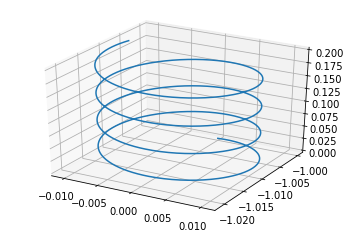

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# definimos valores iniciales de la velocidad
vox=0.5; voy=0; voz=0.4
# resolvemos el sistema de ecuaciones
t, x, y, z = sistema_runge_kutta(v_x, v_y, v_z, x0, y0, z0, to, tf, n)

#Grafica:
fig=plt.figure()
ax = plt.axes(projection="3d")

X = np.ravel(x)
Y = np.ravel(y)
Z = np.ravel(z)
ax.plot(X,Y,Z)

In [ ]:
'''
# gráfica x vs y
plt.plot(x,y, alpha=0.7)
plt.title('x vs y')
plt.show()
# gráfica x vs z
plt.plot(x, z, alpha=0.7, color='r')
plt.title('x vs z')
plt.show()
# gráfica x, y, z vs t
plt.plot(t, x, alpha=0.7, label='t vs x')
plt.plot(t, y, alpha=0.7, color='g', label='t vs y')
plt.plot(t, z, alpha=0.7, color='r', label='t vs z')
plt.legend()
plt.title('x, y, z vs z')
plt.show()
'''

"\n# gráfica x vs y\nplt.plot(x,y, alpha=0.7)\nplt.title('x vs y')\nplt.show()\n# gráfica x vs z\nplt.plot(x, z, alpha=0.7, color='r')\nplt.title('x vs z')\nplt.show()\n# gráfica x, y, z vs t\nplt.plot(t, x, alpha=0.7, label='t vs x')\nplt.plot(t, y, alpha=0.7, color='g', label='t vs y')\nplt.plot(t, z, alpha=0.7, color='r', label='t vs z')\nplt.legend()\nplt.title('x, y, z vs z')\nplt.show()\n"

d) (4p) Modifique el programa para el caso cuando el camo magnético
varía con el tiempo como $B(t) = B\sin{(\omega t)}$ y la velocidad inicial de ingreso al campo se encuentra en el plano $(x,z)$ formando un ángulo con el eje $z$ $45°$ y su valor es de $10$ $\text{m}/\text{s}$. Corra el programa escogiendo adecuadamente la frecuencia angular $\omega$ y el tiempo de observación $t_{\text{max}}$ para obtener una trayectoria cercana a la siguiente figura. ¿Cómo interpreta la trayectoria obtenida?

Para realizar graficas en 3D ver por ejemplo https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

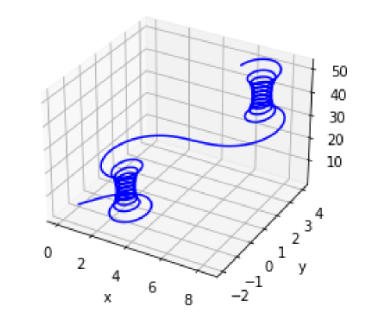

Figure 1: Trayectoria de una partícula cargada cuando ingresa bajo cierto ángulo respecto a la direccion del campo magnético, el cual es homogéneo en el espacio pero varia con el tiempo como $B(t) = B\sin{(\omega t)}$

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# definimos las funciones

def tran1(t, x, vx):
    return vx
def tran2(t,y,vy):
    return vy
def tran3(t,z,vz):
    return vz
def acelx(t, x, vx, y, vy):
    return (q/m) * B * np.sin(w*t)  * vy
def acely(t, x, vx, y, vy):
    return - (q/m) * B * np.sin(w*t)  * vx
def acelz(t, z, vz):
    return 0

In [ ]:
def runge_kutta(tran1,tran2, tran3, acelx, acely, acelz, x0, y0, z0, vx0,vy0,vz0, to, tf, n):
    h = (tf-to)/n
    # inicializamos valores
    t = np.zeros(n + 1)
    x = np.zeros(n + 1)
    vx = np.zeros(n + 1)
    y = np.zeros(n + 1)
    vy = np.zeros(n + 1)
    z = np.zeros(n + 1)
    vz = np.zeros(n + 1)
    # condiciones iniciales
    x[0] = x0
    vx[0] = vx0
    y[0] = x0
    vy[0] = vy0
    z[0] = z0
    vz[0] = vz0
    for i in range(n):
        k1 = tran1(t[i], x[i], vx[i])
        k11 = tran2(t[i], y[i], vy[i])
        k111 = tran3(t[i], z[i], vz[i])
        l1 = acelx(t[i], x[i], vx[i], y[i], vy[i])
        l11 = acely(t[i], x[i], vx[i], y[i], vy[i])
        l111 = acelz(t[i],z[i],vz[i])

        k2 = tran1(t[i] + h/2, x[i] + h*k1 / 2, vx[i] + h*l1 / 2)
        k22 = tran2(t[i] + h/2, y[i] + h*k11 / 2, vy[i] + h*l11 / 2)
        k222 = tran3(t[i] + h/2, z[i] + h*k111 / 2, vz[i] + h*l111 / 2)
        l2 = acelx(t[i] + h/2, x[i] + h*k1 / 2, vx[i] + h*l1 / 2,y[i] + h*k11 / 2, vy[i] + h*l11 / 2)
        l22 = acely(t[i] + h/2, x[i] + h*k1 / 2, vx[i] + h*l1 / 2,y[i] + h*k11 / 2, vy[i] + h*l11 / 2)
        l222 = acelz(t[i] + h/2, z[i] + h*k111 / 2, vz[i] + h*l111 / 2)

        k3 = tran1(t[i] + h/2, x[i] + h*k2 / 2, vx[i] + h*l2 / 2)
        k33 = tran2(t[i] + h/2, y[i] + h*k22 / 2, vy[i] + h*l22 / 2)
        k333 = tran3(t[i] + h/2, z[i] + h*k222 / 2, vz[i] + h*l222 / 2)
        l3 = acelx(t[i] + h/2, x[i] + h*k2 / 2, vx[i] + h*l2 / 2,y[i] + h*k22 / 2, vy[i] + h*l22 / 2)
        l33 = acely(t[i] + h/2, x[i] + h*k2 / 2, vx[i] + h*l2 / 2,y[i] + h*k22 / 2, vy[i] + h*l22 / 2)
        l333 = acelz(t[i] + h/2, z[i] + h*k222 / 2, vz[i] + h*l222 / 2)

        k4 = tran1(t[i] + h, x[i] + h*k3, vx[i] + h*l3 / 2)
        k44 = tran2(t[i] + h, y[i] + h*k33, vy[i] + h*l33 / 2)
        k444 = tran3(t[i] + h, z[i] + h*k333, vz[i] + h*l333 / 2)
        l4 = acelx(t[i] + h, x[i] + h*k3, vx[i] + h*l3, y[i] + h*k33, vy[i] + h*l33)
        l44 = acely(t[i] + h, x[i] + h*k3, vx[i] + h*l3, y[i] + h*k33, vy[i] + h*l33)
        l444 = acelz(t[i] + h, z[i] + h*k333, vz[i] + h*l333 / 2)

        x[i + 1] = x[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)*h
        vx[i + 1] = vx[i] + (1 / 6) * (l1 + 2 * l2 + 2 * l3 + l4)*h
        y[i + 1] = y[i] + (1 / 6) * (k11 + 2 * k22 + 2 * k33 + k44)*h
        vy[i + 1] = vy[i] + (1 / 6) * (l11 + 2 * l22 + 2 * l33 + l44)*h
        z[i + 1] = z[i] + (1 / 6) * (k111 + 2 * k222 + 2 * k333 + k444)*h
        vz[i + 1] = vz[i] + (1 / 6) * (l111 + 2 * l222 + 2 * l333 + l444)*h
        t[i+1] = t[i] + h
    return t, x, vx, y, vy, z, vz

In [ ]:
#DATOS:
q = 1.602 * 10**(-19)
B = - 0.5 * 10**(-6)
m = 1.6725 * 10**(-27)
w = 1
# definimos condiciones iniciales de la posicion y velocidad
x0 = 0; y0 = 0; z0 = 0; vx0=10*np.sqrt(2); vy0=0; vz0=10*np.sqrt(2)
# parametros runge kutta
n = 10000 ; to = 0; tf = 6.2
# resolvemos el sistema de ecuaciones
t, x, vx, y, vy, z, vz = runge_kutta(tran1,tran2, tran3, acelx, acely, acelz, x0, y0, z0, vx0,vy0,vz0, to, tf, n)

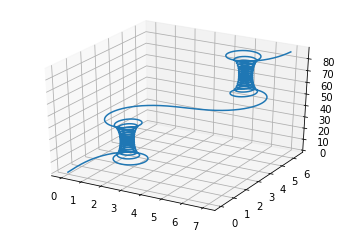

In [ ]:
#Grafica:
fig=plt.figure()
ax = plt.axes(projection="3d")

X = np.ravel(x)
Y = np.ravel(y)
Z = np.ravel(z)
ax.plot(Y,X,Z)

2. (4p) Obtenga una secuencia de $N = 1000$ puntos aleatorios uniformemente distribuidos en la region mostarda en la figura 2. Muestre la distribución de los puntos en la gráfica.

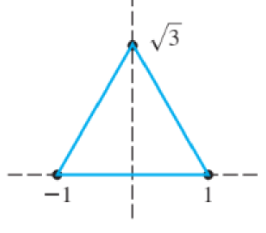

Figure 2: Región a generar los puntos aleatorios

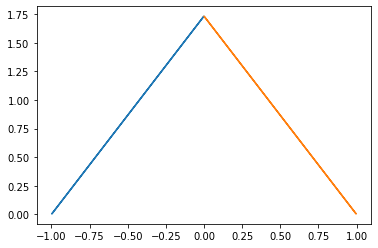

In [ ]:
import numpy as np
from random import random
import random
import matplotlib.pyplot as plt

def inversion(N):
    vx=[]
    vr=[]
    vy=[]
    vz=[]
    for i in range(N):
        r = random.uniform(0, np.sqrt(3))  # na entre 0 y 1
        if r>0:
         x = 1 - (r / np.sqrt(3))  # transformacion
         y = (r / np.sqrt(3)) - 1
        else:
         x = 1
         y = -1 
        vx.append(x)
        vr.append(r)
        vy.append(y)
    return (vx,vy,vr) 

# numero de eventos (puntos)
N = 1000
# llamado de la funcion
gx,gy,gr =inversion(N)


plt.plot(gy, gr, gx, gr)

Ingrese el número de puntos1000


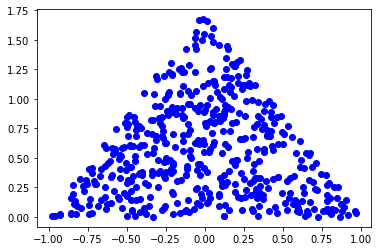

In [ ]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

f = lambda x: -np.sqrt(3)*abs(x) + np.sqrt(3)

def triangulo(n,f):
  vx = []
  vy = []
  for i in range(0,n+1):
    r = random()
    x = 2*r - 1
    s = random()
    y = np.sqrt(3)*s
    if y <= f(x):
      vx.append(x)
      vy.append(y)
  return vx, vy

n = int(input("Ingrese el número de puntos"))
vx, vy = triangulo(n,f)
plt.plot(vx,vy, "bo")

